In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=500, centers=4)

<Axes: >

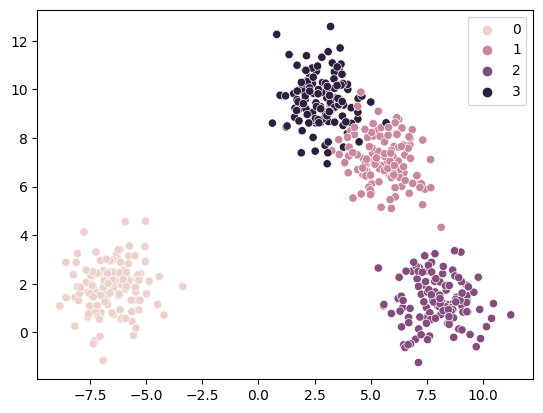

In [4]:
sns.scatterplot(x=dataset[0][:,0], y=dataset[0][:,1],hue=dataset[1], marker='o')

In [5]:
bandwidth = estimate_bandwidth(dataset[0], quantile=0.2, n_samples=500)
clustering = MeanShift(bandwidth=bandwidth).fit(dataset[0])

In [6]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


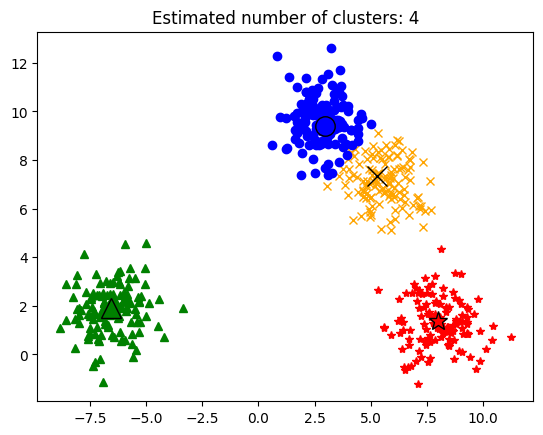

In [15]:
plt.figure(1)
plt.clf()

colors = ["orange", "blue", "green", "red"]
markers = ["x", "o", "^", "*"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(dataset[0][my_members, 0], dataset[0][my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [8]:
from pyhull.convex_hull import ConvexHull

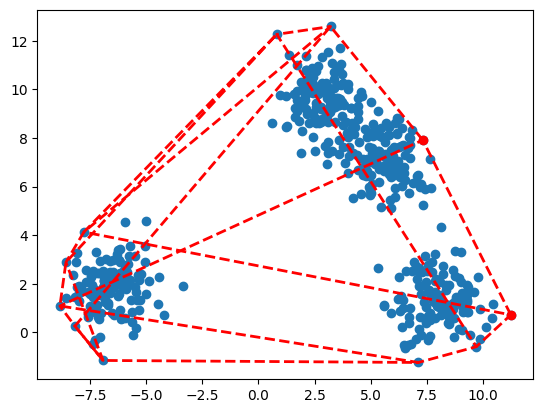

In [9]:
hull = ConvexHull(dataset[0])
plt.plot(dataset[0][:,0], dataset[0][:,1], 'o')
plt.plot(dataset[0][hull.vertices,0], dataset[0][hull.vertices,1], 'r--', lw=2)
plt.plot(dataset[0][hull.vertices[0],0], dataset[0][hull.vertices[0],1], 'ro')

In [10]:
hulls = [ConvexHull(dataset[0][labels == i]) for i in range(n_clusters_)]

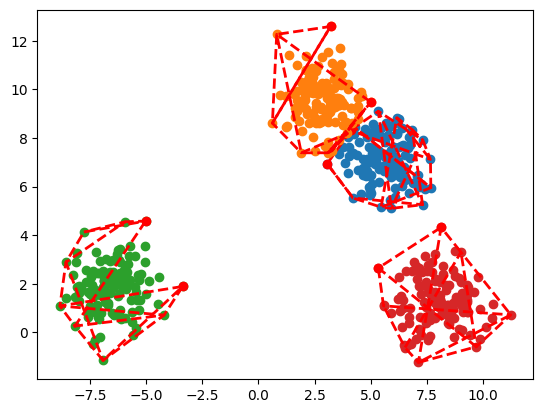

In [11]:
for i,hull in enumerate(hulls):
    subset = dataset[0][labels == i]
    plt.plot(subset[:,0], subset[:,1], 'o')
    plt.plot(subset[hull.vertices,0], subset[hull.vertices,1], 'r--', lw=2)
    plt.plot(subset[hull.vertices[0],0], subset[hull.vertices[0],1], 'ro')